# Reorder a sequence of images that were placed out of order
In this notebook, we obtain an image sequence from a gif, unorder it, and then attempt to recover its order sequence. We then compare the recovered image sequence with the ordered image sequence. 

## Obtain image sequence 
This cell only needs to be run once for each gif. In order to compare image sequences, each image is saved in the a data folder with the following format:
> `frame_.png`


In [ ]:
from PIL import Image, ImageSequence

# Implement similar to below:
# https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python
# image credit: https://www.pinterest.com.au/amp/pin/crash-bandicoot-gif--325385141804483015/
# Create directory with gifs and also make it create a directory when we load the gif data 

with Image.open("./data/homer.gif") as gif:
    index = 1
    for frame in ImageSequence.Iterator(gif):
        frame.save(f"frame_{index}.png")
        index += 1

## Load and display image sequence
All of the images made from the gif are stored in ``data_folder``. The image data, along with an image label gets stored in a dictionary for each image. The key value (int) used to access these items represents the image position inside the image sequence. We generate unordered image sequences by randomly shuffling their key values. Specifying the seed allows us to repeat the experiment with the same set of unordered images. 

The black and white images plotted by this cell are obtained from an example gif. Each row displays a subset of the image sequence (think of it as a movie tape) and is labeled with its corresponding image position. 


In [9]:
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np
import os

matplotlib.rc("image", cmap='gray')
%matplotlib inline

def load_image(filename, greyscale = True):
    """Load an image and save it as an NxM array."""
    if greyscale:
        img = Image.open(filename).convert("L")
    else:
        img = Image.open(filename).convert("RGB")
    return np.array(img)

def load_sequence(folder):
    """Load sequence of images (.png) in data folder and store them in a dictionary."""
    output = {} # keys: i (found in image filename)
    for f in os.listdir(folder):
        if f.endswith(".png"):
            label = int(f[6:-4])
            output[label]= {"label":label,
                            "data": load_image(os.path.join(folder,f))}
    return output

def shuffle(sequence, seed_value=2021):
    """Randomly shuffle a sequence of numbers."""
    np.random.seed(seed_value)
    return np.random.permutation(sequence)

def load_sequence_and_shuffle(folder, frame1_fixed = True):
    """Load an ordered sequence of frames (dictionary) and return a shuffled version (dictionary)."""
    # Need to have an error for number of frames mismatch
    output = {} # keys: i 
    seq = load_sequence(folder)
    n = len(seq)
    iseq = list(range(1,n+1))
    
    if frame1_fixed:
        print("Now shuffling all frames, except for frame1.")
        new_iseq = shuffle(range(2,n+1))
        new_iseq = [1,*new_iseq]
    else:
        print("Now shuffling all frames.")
        new_iseq = shuffle(iseq)
    for i, k in zip(iseq, new_iseq):
        print(f"Moving image{i} -> position {k}") 
        output[i] = seq[k]
    return output

def imshow_image(ax, image):
    """
    Displays image in the axes.
    ax: a matplotlib Axes instance into which we plot.
    image: NxM array that we are displaying.
    """
    ax.imshow(image)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)        

# Load the data:
#data_folder = "./data/mario_kart/"
data_folder = "./data/homer/"
sequence = load_sequence(data_folder)
shuffled_sequence = load_sequence_and_shuffle(data_folder)

Now shuffling all frames, except for frame1.
Moving image1 -> position 1
Moving image2 -> position 16
Moving image3 -> position 19
Moving image4 -> position 13
Moving image5 -> position 6
Moving image6 -> position 11
Moving image7 -> position 10
Moving image8 -> position 29
Moving image9 -> position 5
Moving image10 -> position 26
Moving image11 -> position 4
Moving image12 -> position 12
Moving image13 -> position 17
Moving image14 -> position 25
Moving image15 -> position 18
Moving image16 -> position 9
Moving image17 -> position 7
Moving image18 -> position 3
Moving image19 -> position 20
Moving image20 -> position 21
Moving image21 -> position 8
Moving image22 -> position 28
Moving image23 -> position 14
Moving image24 -> position 24
Moving image25 -> position 15
Moving image26 -> position 2
Moving image27 -> position 27
Moving image28 -> position 23
Moving image29 -> position 22


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


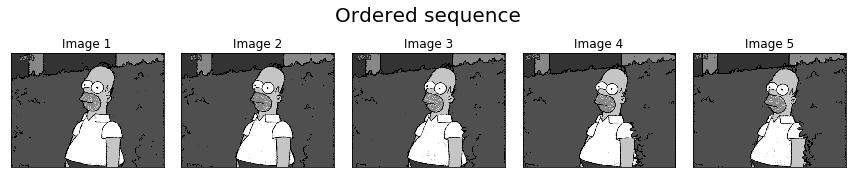

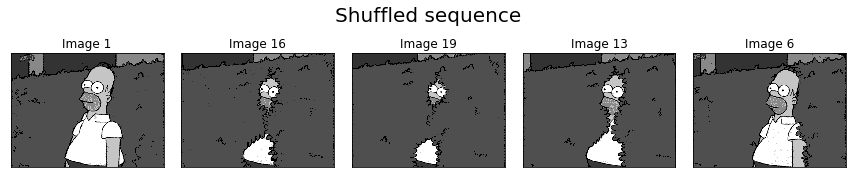

In [10]:
def imshow_sequence(sequence, title = " ", nimages=5):
    """
    Displays a subset of the image sequence as a film strip.
    
    sequence: dictionary of image sequence
    title: " " (default) to add a sequence title.
    nimages: 5 (default) will display the fisrt 5 images in the sequence. 

    returns:
    A figure and a set of subplots.
    """
    if nimages > len(sequence):
        nimages = len(sequence)
    f, ax = plt.subplots(1,nimages,figsize=(12,3),tight_layout=True)
    f.suptitle(title, fontsize=20)
    for i,k in enumerate(range(1,nimages+1)):  
        label = sequence[k]["label"]
        imshow_image(ax[i], sequence[k]["data"])
        ax[i].set_title(f"Image {label}")
    return f, ax

titles = ["Ordered sequence", "Shuffled sequence"]
for i,seq in enumerate([sequence, shuffled_sequence]):
    f, ax = imshow_sequence(seq, titles[i])

f.savefig("./figures/filmstrip.pdf")


**Figure:** An example image sequence that has been shuffled for this analysis. 

## Comparing images
Assuming that we are focusing on dynamic scenes, we needed to identify a quantity that accumulates/decays with time. I decided that the simplest way to compare two images is by computing the difference at every corresponding pixel of the two images and then counting the total number of zeros. Specifically, the two images with the most zeros are probably adjacent to eachother. 

In this cell, we show that the number of zeros decreases as you move further away in time from the reference image.  


Counted 125000 zeros for difference between frame1 and frame1
Counted 78299 zeros for difference between frame2 and frame1
Counted 66279 zeros for difference between frame3 and frame1
Counted 62228 zeros for difference between frame4 and frame1
Counted 62050 zeros for difference between frame5 and frame1


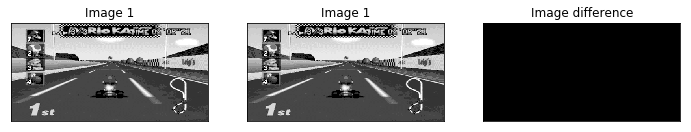

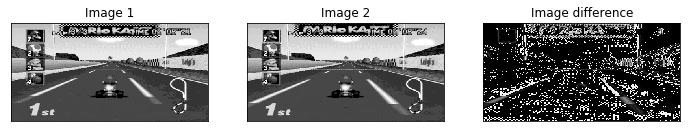

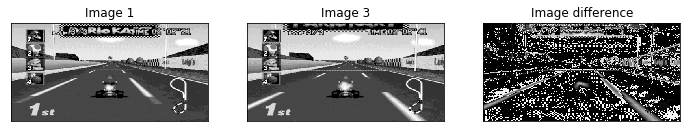

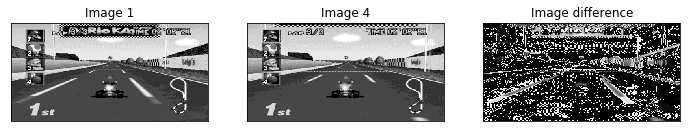

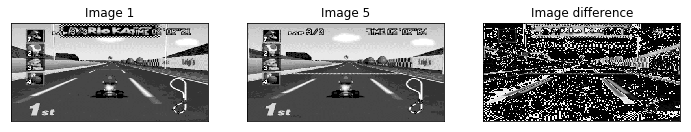

In [3]:

def imshow_image_difference(reference_image, test_image, titles):
    f, ax = plt.subplots(1, 3, figsize=(12,4))
    imshow_image(ax[0],reference_image)
    imshow_image(ax[1],test_image)
    imshow_image(ax[2],np.subtract(test_image,reference_image))
    for i,k in enumerate(titles):
        ax[i].set_title(f"Image {k}")
    return f, ax

def count_zeros(reference_image, test_image):
    """Computes the difference between two images and returns the number of zeros pixels."""
    diff = np.subtract(test_image, reference_image)
    return sum(diff.flatten()==0)

n = len(sequence)
iref = 1
for i in range(1,6):
    f, ax = imshow_image_difference(sequence[iref]["data"], sequence[i]["data"], titles = (iref, i,"difference"))
    n_zeros = count_zeros(sequence[iref]["data"], sequence[i]["data"])
    print(f"Counted {n_zeros} zeros for difference between frame{i} and frame1")

f.savefig("./figures/differences.pdf")

**Figure:** In the first and second column we display the reference and test images, respectively. Then in the third column we show the difference of these two frames.  

## Next, order the sequence
We repeat the following steps for each image in the shuffled sequence:
1. Pick a reference image.
2. Compare the reference image with the remaining images of the input sequence. 
3. Identify the image that results in the most zeros after being subtracted from the reference image. 
4. Add the it to the new output sequence.
5. Then remove it from the input sequence.
6. Repeat steps (1-5) until the input sequence is empty. 


In [11]:
shuffled_sequence_copy = shuffled_sequence.copy()

def adjacent_image_index(sequence, reference_image):
    iseq=[*sequence]
    n_zeros = [count_zeros(reference_image, sequence[i]["data"]) for i in iseq]
    return iseq[np.argmax(n_zeros)]
    
def order_sequence(sequence, frame1fixed = True):
    """Attempts to order a sequence of images that have been randomly shuffled."""
    output = {} # keys: i 
    iin = 1    # used for indexing the input sequence 
    iout = 1   # used for indexing the output sequence
    ordered_frames = []  # used only for printing 

    if frame1fixed:
        print("Frame1 was fixed.")
        print(f"Inserting frame{iin} into the output sequence & removing frame{iin} from the input sequence.")
        ordered_frames.append(iin)
        output[iout] = sequence[iin]
        sequence.pop(iin, None)
        print(f"Input sequence: ", [*sequence])
        print(f"Output sequence: ", ordered_frames)
        print(" ")
    else:
        print("This feature doesn´t exist yet. :'(")
        return None
  
    while len(sequence) > 0:
        print(f"Comparing frame{iin} with frames:",[*sequence])
        reference_image = output[iout]["data"]
        iin = adjacent_image_index(sequence, reference_image)
        print(f"Identified frame{iin} as the most similar frame.")
        print(f"Inserting frame{iin} into the output sequence & removing frame{iin} from the input sequence.")
        iout += 1
        ordered_frames.append(iin)
        output[iout] = sequence[iin]
        sequence.pop(iin, None)
        print(f"Input sequence:",[*sequence])
        print(f"Output sequence:", ordered_frames)
        print(" ")
    
    return output
            
my_sequence = order_sequence(shuffled_sequence_copy, frame1fixed=True)

Frame1 was fixed.
Inserting frame1 into the output sequence & removing frame1 from the input sequence.
Input sequence:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Output sequence:  [1]
 
Comparing frame1 with frames: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Identified frame26 as the most similar frame.
Inserting frame26 into the output sequence & removing frame26 from the input sequence.
Input sequence: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29]
Output sequence: [1, 26]
 
Comparing frame26 with frames: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29]
Identified frame18 as the most similar frame.
Inserting frame18 into the output sequence & removing frame18 from the input sequence.
Input sequence: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1

## Analysis results
The guessed values for the image positions get compared to the actual image positions that got stored in the image label. We then calculate and store the following quantities in a score dictionary:
- Percent of images that were sequenced correctly.
- How far away each image was placed from its true position.

The code below plots the true sequence order with the guessed sequence order. Ideally, the points should fall on the line y = x.


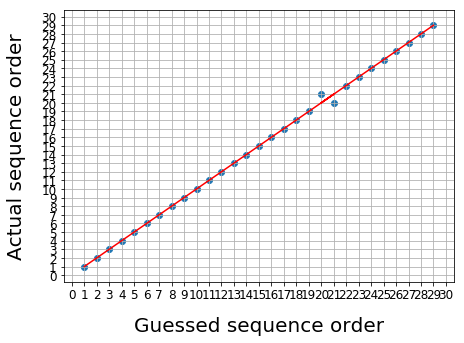

In [13]:
def compare_sequence_order(list1, list2):
    """Returns both the number of matched and mismatched elements between two lists."""
    result = [i == k for i,k in zip(list1,list2)]
    return (result.count(True), result.count(False))

def score_my_sequence(sequence):
    """Takes a test sequence and calculates its order accuracy."""
    keys = ["sequence length","good","bad","order accuracy","order distance","total order distance"]
    score = {key:None for key in keys}     
    n = len(sequence)
    guessed_sequence_order = np.arange(1,n+1)
    actual_sequence_order = np.array([sequence[i]["label"] for i in guessed_sequence_order])    #Taken from the image filename
    ngood, nbad = compare_sequence_order(guessed_sequence_order, actual_sequence_order)
    score["sequence length"] = n
    score["good"] = ngood
    score["bad"] = nbad
    score["order accuracy"] = ngood/n * 100.0
    score["image order distance"] = np.abs(guessed_sequence_order-actual_sequence_order)
    score["total_order distance"] = np.sum(np.abs(guessed_sequence_order-actual_sequence_order))
    return score

def plot_sequence_order(sequence):
    """Takes a test sequence and plots the guessed image positions vs. actual image positions."""
    n = len(sequence)
    guessed_sequence_order = np.arange(1,n+1)
    actual_sequence_order = np.array([sequence[i]["label"] for i in guessed_sequence_order])
    f = plt.figure(figsize=(7,5))
    plt.plot(actual_sequence_order, actual_sequence_order, "red")
    plt.scatter(x = guessed_sequence_order, y = actual_sequence_order, )
    plt.xticks(np.arange(0,n+2), fontsize=12)
    plt.yticks(np.arange(0,n+2), fontsize=12)
    plt.ylabel("Actual sequence order", fontsize=20, labelpad=15)
    plt.xlabel("Guessed sequence order", fontsize=20, labelpad=15)
    plt.grid()

    return f

my_score = score_my_sequence(my_sequence)
f = plot_sequence_order(my_sequence)

f.savefig("./figures/results.pdf")

In [14]:
my_score

{'sequence length': 29,
 'good': 27,
 'bad': 2,
 'order accuracy': 93.10344827586206,
 'order distance': None,
 'total order distance': None,
 'image order distance': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0]),
 'total_order distance': 2}

**Figure:** Here we display our guessed sequence order with the actual sequence order. The red straight line marks the ideal locations. 

Looking more closeley at the homer gif, it shows that our assumption about adjacent images doesn´t always hold true. For example, we found that image 21 was more similar to image 19 than image 20. Thus this algorithm can fail at distinguishing between two very similar images. Although, to be fair, it might actually look better in that order. 

175041

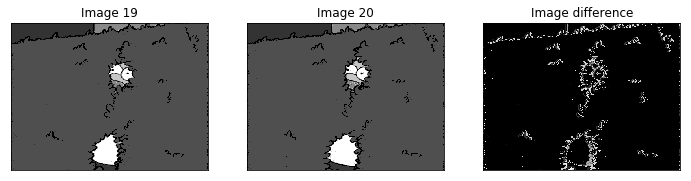

In [16]:
my_score
imshow_image_difference(my_sequence[20]["data"], my_sequence[19]["data"], (19, 20, "difference"))
count_zeros(sequence[20]["data"],sequence[19]["data"])


175480

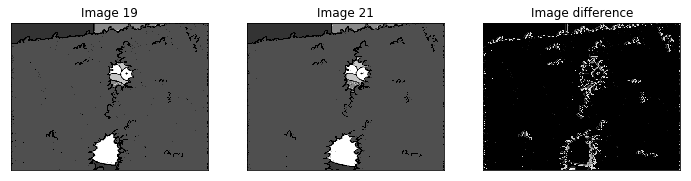

In [17]:
imshow_image_difference(my_sequence[21]["data"], my_sequence[19]["data"],  (19, 21, "difference"))
count_zeros(sequence[21]["data"], sequence[19]["data"])

## If I had more time...
I would take one of either two directions: 
- Try out other image similarty metrics, such as euclidean distance or cosine similarity. 
- Include the RGB channel information in this analysis.  

In [18]:
import itertools

def all_nzeros_in_sequence(sequence, nimages = 5 ,unique = True):
    dict_nzeros = {}
    if nimages > len(sequence):
        nimages = len(sequence)
    iseq = list(range(1,nimages+1))
    if unique:
        pairs = list(itertools.permutations(iseq, 2)) # Only unique combinations 
    else:
        pairs = list(itertools.combinations(iseq, 2)) # All possible combinations 
    for i in pairs:
        print(f"Subtracting frame{i[1]} from frame{i[0]} and counting zeros.")
        reference_image = shuffled_sequence[i[0]]["data"]
        test_image = shuffled_sequence[i[1]]["data"]
        dict_nzeros[i] = count_zeros(reference_image, test_image)
    return dict_nzeros

dict_nzeros = all_nzeros_in_sequence(shuffled_sequence)

Subtracting frame2 from frame1 and counting zeros.
Subtracting frame3 from frame1 and counting zeros.
Subtracting frame4 from frame1 and counting zeros.
Subtracting frame5 from frame1 and counting zeros.
Subtracting frame1 from frame2 and counting zeros.
Subtracting frame3 from frame2 and counting zeros.
Subtracting frame4 from frame2 and counting zeros.
Subtracting frame5 from frame2 and counting zeros.
Subtracting frame1 from frame3 and counting zeros.
Subtracting frame2 from frame3 and counting zeros.
Subtracting frame4 from frame3 and counting zeros.
Subtracting frame5 from frame3 and counting zeros.
Subtracting frame1 from frame4 and counting zeros.
Subtracting frame2 from frame4 and counting zeros.
Subtracting frame3 from frame4 and counting zeros.
Subtracting frame5 from frame4 and counting zeros.
Subtracting frame1 from frame5 and counting zeros.
Subtracting frame2 from frame5 and counting zeros.
Subtracting frame3 from frame5 and counting zeros.
Subtracting frame4 from frame5 

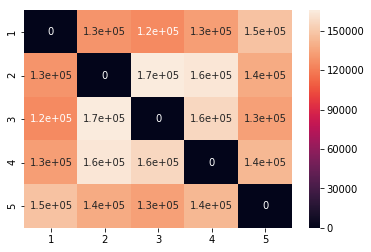

In [19]:
import pandas as pd
import seaborn as sb   

def plot_heat_map(dictionary):
    ser = pd.Series(list(dictionary.values()),
                  index=pd.MultiIndex.from_tuples(dictionary.keys()))

    df = ser.unstack().fillna(0)
    sb.heatmap(df,annot=True)

plot_heat_map(dict_nzeros)
    

**Figure:** Here we show how a heat map may be used to visualize a larger dataset. 

In [ ]:
import scipy.spatial.distance as dist 

# Other distance metrics:
# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

def euclidean(arr1, arr2):
    return dist.euclidean(arr1, arr2)

def sqeuclidean(arr1, arr2):
    return dist.sqeuclidean(arr1, arr2)

def correlation(arr1, arr2):
    return dist.correlation(arr1, arr2)

def cosine(arr1, arr2):
    return dist.cosine(arr1, arr2)

pixel_distance_functions = [euclidean, sqeuclidean, correlation, cosine]


## To summarize
This notebook has outlined one method for ordering a seqeuence of images that have been shuffled - Ordering images by the total number of zeros found in the difference between two images. Results look promising for now! 

